<a href="https://colab.research.google.com/github/Saz1978/DataArchitecture/blob/main/Simplified_Algorithm_Selection_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
datapath = 'https://raw.githubusercontent.com/a-forty-two/DFE5/main/breastcancer_data.csv'
data = pd.read_csv(datapath, header=0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [2]:
data.info()
#no null values for us!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1138 non-null   int64  
 1   diagnosis               1138 non-null   object 
 2   radius_mean             1138 non-null   float64
 3   texture_mean            1138 non-null   float64
 4   perimeter_mean          1138 non-null   float64
 5   area_mean               1138 non-null   float64
 6   smoothness_mean         1138 non-null   float64
 7   compactness_mean        1138 non-null   float64
 8   concavity_mean          1138 non-null   float64
 9   symmetry_mean           1138 non-null   float64
 10  fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 97.9+ KB


In [33]:
correlations = data.corr() 
correlations 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000


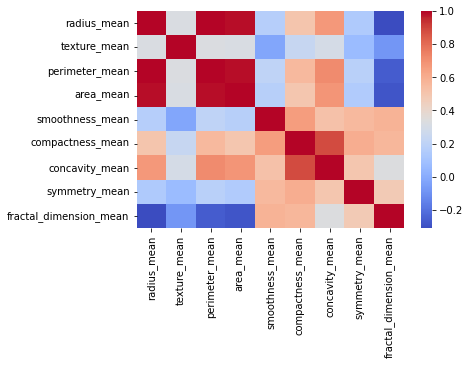

In [34]:
import seaborn as sns # visualization library 
sns.heatmap(correlations, cmap='coolwarm') # coolwarm-> red and blue color style

In [5]:
# convert ID to indexes instead of removing!
data = data.set_index("id")
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [6]:
# Normalizing data 
# ONLY for input! 
# output-> in our case is M and B
# ML only happens on numbers!
# way to convert M and B into 1 and 0 

In [7]:
# all X1...xN-> normalize
# all y -> encode into numbers

In [8]:
y = data.loc[:, ['diagnosis']]
x = data.iloc[:, 1:]

In [9]:
y.head()

,diagnosis
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M


In [10]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [35]:
import sklearn 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

In [12]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
90524101,17.99,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.1992,0.06069
918192,13.94,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.1976,0.06457
92769,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.2164,0.07356
93169,15.50,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.2085,0.06864
89143601,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.2013,0.05955


In [13]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
911320502,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.1454,0.05549
902727,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.1617,0.05594
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744
93148,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.1806,0.06079
916838,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.1802,0.06188


In [14]:
# Normalize the data
# Calculate mean and standard dev for training data
# apply the same assumptions to testing data also

In [36]:
stats = xtrain.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
radius_mean,910.0,14.120444,3.529203,6.98100,11.662500,13.28000,15.850000,28.11000
texture_mean,910.0,19.292758,4.317141,9.71000,16.162500,18.84000,21.817500,39.28000
perimeter_mean,910.0,91.947275,24.327379,43.79000,74.720000,85.98000,105.550000,188.50000
area_mean,910.0,653.714615,347.744502,143.50000,416.450000,545.65000,787.050000,2499.00000
smoothness_mean,910.0,0.096391,0.014315,0.05263,0.086540,0.09586,0.105400,0.16340
compactness_mean,910.0,0.105336,0.054063,0.01938,0.063945,0.09453,0.130900,0.34540
concavity_mean,910.0,0.089412,0.080157,0.00000,0.029500,0.06155,0.132300,0.42680
symmetry_mean,910.0,0.180703,0.027578,0.10600,0.161725,0.17915,0.195675,0.30400
fractal_dimension_mean,910.0,0.062973,0.007242,0.04996,0.058215,0.06183,0.066195,0.09744


In [16]:
xmean = stats['mean']
xstd = stats['std']


In [17]:
xtrain_norm = (xtrain - xmean)/xstd
xtest_norm = (xtest - xmean)/xstd

In [37]:
xtrain_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
90524101,1.090184,0.301976,1.057226,0.941028,0.524505,0.502884,0.408225,0.663859,-0.307445
918192,-0.048990,-1.404575,-0.064068,-0.168946,2.046486,-0.123907,0.166439,0.604750,0.251730
92769,0.567008,0.306533,0.661571,0.402376,1.486512,1.872856,1.067757,1.299284,1.547344
93169,0.389803,0.397670,0.449468,0.414384,1.127554,1.012331,0.814578,1.007432,0.838287
89143601,-0.771873,-0.101308,-0.803984,-0.722398,-0.657902,-1.029653,-0.808428,0.741440,-0.471739


In [38]:
logic = { 'M': 1, 'B': 0}
ytrain_encoded = ytrain['diagnosis'].map(lambda diag: logic[diag])
ytest_encoded = ytest['diagnosis'].map(lambda diag: logic[diag])


In [39]:
ytest_encoded

id
894089      0
86973701    0
90401601    0
857810      0
93151       0
           ..
92796       1
92953       1
852763      1
92913       1
901011      0
Name: diagnosis, Length: 228, dtype: int64

In [21]:
# Metrics
# classification -> accuracy, cross_validation_score 
# accuracy= correct guesses / total guesses 
# cross validation-> break the data-> d1, d2....
# for each dataset d1...dn-> we will calculate accuracy
# validate-> accuracy is consistent across all subsets!

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
all_accuracies = []
all_csv = []

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtrain_norm, ytrain_encoded)


KNeighborsClassifier()

In [24]:
predictions = model.predict(xtest_norm)

In [40]:
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0])

In [26]:
accuracy_score(ytest_encoded, predictions)

0.9429824561403509

In [27]:
cross_val_score(model, xtrain_norm, ytrain_encoded, cv=5)

# Overfitting-> this algorithm is biased towards 1st,2nd,4th and 5th subsets!


array([0.96703297, 0.93956044, 0.96703297, 0.95604396, 0.92857143])

In [28]:
from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph
from sklearn.naive_bayes import GaussianNB # probability
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
allalgos = {"Stochastic Gradient Descend":SGDClassifier(),
            "Support Vector Machines": SVC(),
            "Linear SVM": LinearSVC(),
            "Gaussian Naive Bayes'": GaussianNB(),
            "Tree Tree": DecisionTreeClassifier(),
            "Jungle": RandomForestClassifier(),
            "KNN": KNeighborsClassifier()}

In [29]:
for algoName, model in allalgos.items():
  print('*****')
  print(algoName)
  model.fit(xtrain_norm, ytrain_encoded)
  predictions = model.predict(xtest_norm)
  accScore = accuracy_score(ytest_encoded, predictions)
  cvScore = cross_val_score(model, xtrain_norm, ytrain_encoded, cv=5)
  all_accuracies.append([algoName,accScore])
  all_csv.append([algoName, cvScore])
  print(accScore)
  print(cvScore)
  





*****
Stochastic Gradient Descend
0.9429824561403509
[0.95604396 0.92857143 0.95604396 0.8956044  0.90659341]
*****
Support Vector Machines
0.956140350877193
[0.96703297 0.92857143 0.97802198 0.95604396 0.94505495]
*****
Linear SVM


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9385964912280702
[0.94505495 0.92307692 0.97252747 0.93406593 0.91758242]
*****
Gaussian Naive Bayes'
0.9078947368421053
[0.93956044 0.88461538 0.95054945 0.91208791 0.88461538]
*****
Tree Tree
0.9736842105263158
[0.98901099 0.95604396 0.97802198 0.98351648 0.95604396]
*****
Jungle
0.9824561403508771
[1.         0.96153846 0.96703297 0.98901099 0.96703297]
*****
KNN
0.9429824561403509
[0.96703297 0.93956044 0.96703297 0.95604396 0.92857143]


In [30]:
# Select the algorithm with highest accuracy and consistent CVS!


In [32]:
all_accuracies

[['Stochastic Gradient Descend', 0.9429824561403509],
 ['Support Vector Machines', 0.956140350877193],
 ['Linear SVM', 0.9385964912280702],
 ["Gaussian Naive Bayes'", 0.9078947368421053],
 ['Tree Tree', 0.9736842105263158],
 ['Jungle', 0.9824561403508771],
 ['KNN', 0.9429824561403509]]